# Cellula Task 3

### Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Libraries

In [2]:
!pip install tensorflow==2.12.0
!pip install keras==2.12.0
!pip install shap==0.42.0
!pip install imbalanced-learn==0.10.1
!pip install scikit-learn==1.2.0

INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 72.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 61.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 83.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 92.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 MB 9.8 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Un

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.1/547.1 kB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 12.3 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.12.3
    Uninstalling imbalanced-learn-0.12.3:
      Successfully uninstalled imbalanced-learn-0.12.3
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 60.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.2
    Uninstalling scikit-learn-1.5.2:
      Successfully uninstalled scikit-learn-1.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.18.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
bigframes 1.18.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.2.0 which is incompatible.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import shap
import xgboost
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, StratifiedKFold

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


### Data Overview

In [4]:
data_path = '/content/drive/MyDrive/CSV/first inten project.csv'
df = pd.read_csv(data_path)
df.head(10)

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled
5,INN00006,1,0,0,2,Meal Plan 2,0,Room_Type 1,346,Offline,0,0,0,100.00,1,9/13/2016,Canceled
6,INN00007,1,1,1,4,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,10/15/2017,Not_Canceled
7,INN00008,3,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,12/26/2018,Not_Canceled
8,INN00009,1,1,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,7/6/2018,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,Online,0,0,0,133.44,3,10/18/2018,Not_Canceled


In [5]:
df.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

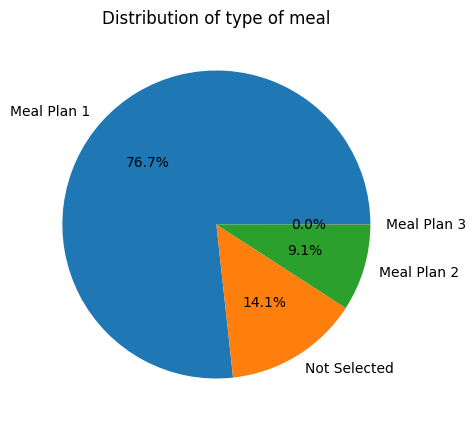

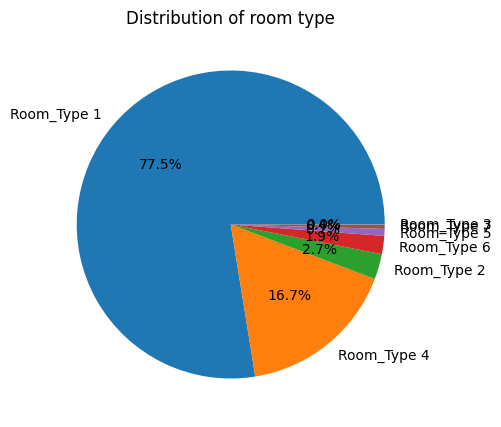

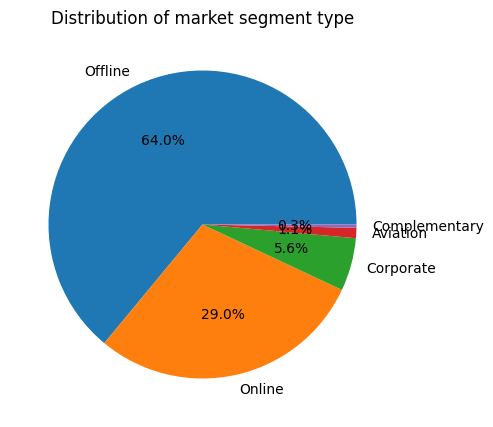

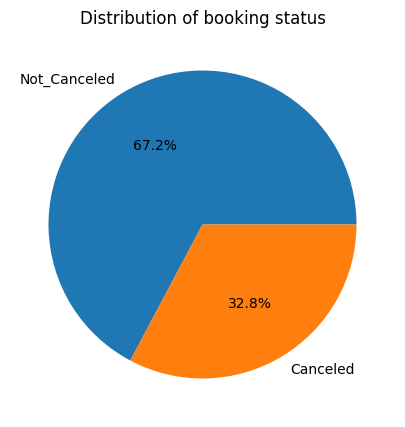

In [7]:
cat_features = ['type of meal', 'room type', 'market segment type', 'booking status']
for feature in cat_features:
    plt.figure(figsize=(10, 5))
    plt.pie(df[feature].value_counts(),
            labels=df[feature].unique(),
            autopct='%1.1f%%'
    )
    plt.title(f'Distribution of {feature}')
    plt.show()
    print()

In [8]:
#df['total_nights'] = df['number of week nights'] + df['number of weekend nights']
#df['average_price_per_night'] = (df['average price '] / df['total_nights']).round(2)
#df['total_guest'] = df['number of adults'] + df['number of children']
#df['average_price_per_night_per_guest'] = (df['average_price_per_night'] / df['total_guest']).round(2)
#df.head()
#num_features = ['number of adults', 'number of children', 'total_guest', 'number of weekend nights',
#                'number of week nights', 'lead time', 'average price ', 'car parking space',
#                'repeated', 'P-C', 'P-not-C', 'special requests', 'total_nights', 'average_price_per_night',
#                'total_guest', 'average_price_per_night_per_guest']
#for feature in num_features:
#    plt.figure(figsize=(10, 5))
#    sns.histplot(df[feature], kde=True)
#    plt.title(f'Distribution of {feature}')
#    plt.show()
#    print()

### Data preprocessing

Handling Missing Values Null values

In [9]:
df.isnull().sum()

,0
Booking_ID,0
number of adults,0
number of children,0
number of weekend nights,0
number of week nights,0
type of meal,0
car parking space,0
room type,0
lead time,0
market segment type,0


Data Type verification

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

Whitespace and Other Cleaning

In [11]:
# Select object columns
object_cols = df.select_dtypes(include='object').columns

# Remove whitespaces from object columns
df[object_cols] = df[object_cols].apply(lambda x: x.str.strip())

In [12]:
df = df.drop('Booking_ID', axis=1)

In [13]:
def split_date(date):
    if '/' in date:  # MM/DD/YYYY format
        month, day, year = date.split('/')
    elif '-' in date:  # YYYY-MM-DD format
        year, month, day = date.split('-')
    else:
        return [np.nan, np.nan, np.nan]  # Handle unexpected formats

    return [int(month), int(day), int(year)]

# Apply the split_date function to the 'date of reservation' column
df[['month', 'day', 'year']] = df['date of reservation'].apply(split_date).apply(pd.Series)
df = df.drop('date of reservation', axis=1)

In [14]:
df[df[['year', 'month', 'day']].isnull().any(axis=1)]

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,booking status,month,day,year


In [15]:
df['booking status'] = df['booking status'].map({'Canceled': 1, 'Not_Canceled': 0})
df[['car parking space', 'repeated', 'P-C', 'P-not-C']] = df[['car parking space', 'repeated', 'P-C', 'P-not-C']].astype(int)
df['room type'] = df['room type'].str.replace('Room_Type ', '').astype(int)

In [16]:
# Apply one-hot encoding for 'type of meal' and 'market segment type'
df = pd.get_dummies(df, columns=['type of meal', 'market segment type'], drop_first=True, dtype=int)

In [17]:
# Calculate the sum of all values in the 'P-C' column
pc_sum = df['P-C'].sum()
pc_nsum = df['P-not-C'].sum()

# Print the result
print(f"The sum of all values  is: {pc_sum} ,{pc_nsum}")


The sum of all values  is: 847 ,5565


In [18]:
#df = df.drop('P-C', axis=1)
#df = df.drop('P-not-C', axis=1)

In [19]:
df.head()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,room type,lead time,repeated,P-C,P-not-C,...,month,day,year,type of meal_Meal Plan 2,type of meal_Meal Plan 3,type of meal_Not Selected,market segment type_Complementary,market segment type_Corporate,market segment type_Offline,market segment type_Online
0,1,1,2,5,0,1,224,0,0,0,...,10,2,2015,0,0,0,0,0,1,0
1,1,0,1,3,0,1,5,0,0,0,...,11,6,2018,0,0,1,0,0,0,1
2,2,1,1,3,0,1,1,0,0,0,...,2,28,2018,0,0,0,0,0,0,1
3,1,0,0,2,0,1,211,0,0,0,...,5,20,2017,0,0,0,0,0,0,1
4,1,0,1,2,0,1,48,0,0,0,...,4,11,2018,0,0,1,0,0,0,1


over sampling

In [20]:
df.isnull().sum()

,0
number of adults,0
number of children,0
number of weekend nights,0
number of week nights,0
car parking space,0
room type,0
lead time,0
repeated,0
P-C,0
P-not-C,0


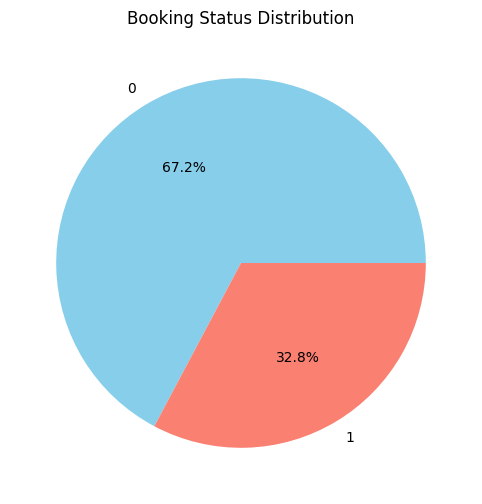

In [21]:
plt.figure(figsize=(8, 6))
df['booking status'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Booking Status Distribution')
plt.ylabel('')
plt.show()

In [22]:
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(random_state=42)
X = df.drop('booking status', axis=1)
y = df['booking status']
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Create a new DataFrame with the resampled data
df = pd.DataFrame(X_resampled, columns=X.columns)
df['booking status'] = y_resampled

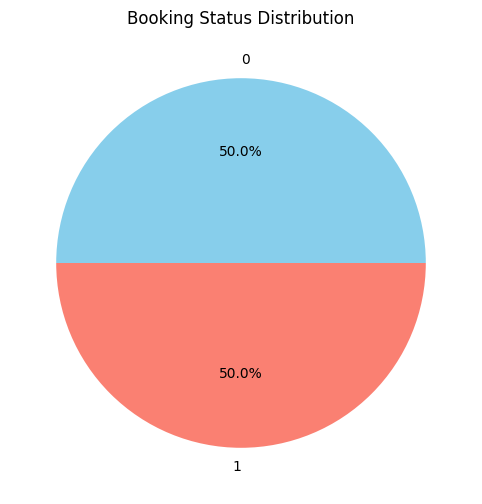

In [23]:
plt.figure(figsize=(8, 6))
df['booking status'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Booking Status Distribution')
plt.ylabel('')
plt.show()

####Year oversampling

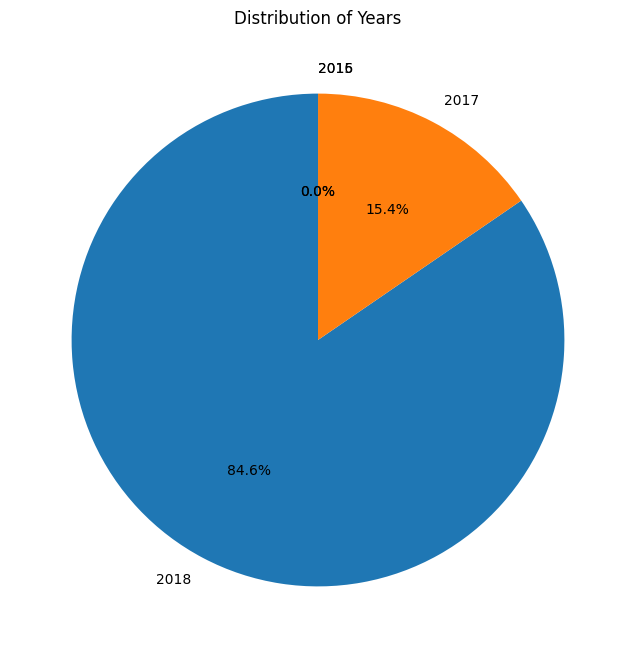

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Count the occurrences of each year
year_counts = df['year'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(year_counts, labels=year_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Years')
plt.show()

In [25]:
print(df['year'].value_counts())

year
2018    41263
2017     7527
2015        1
2016        1
Name: count, dtype: int64


In [26]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

# Assuming df is the original dataframe
X = df.drop('year', axis=1)
y = df['year']

# Define the sampling strategy to maintain 2018 as the majority class
sampling_strategy = {2018: len(y[y == 2018]), 2017: int(len(y[y == 2018])*0.5 )}

# Apply RandomOverSampler with the custom strategy
oversampler = RandomOverSampler(sampling_strategy=sampling_strategy, random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Create a new DataFrame with the resampled data
df = pd.DataFrame(X_resampled, columns=X.columns)
#df_resampled['year'] = y_resampled
df['year'] = y_resampled
# Check the distribution after resampling
#print(df_resampled['year'].value_counts())
print(df['year'].value_counts())

year
2018    41263
2017    20631
2015        1
2016        1
Name: count, dtype: int64


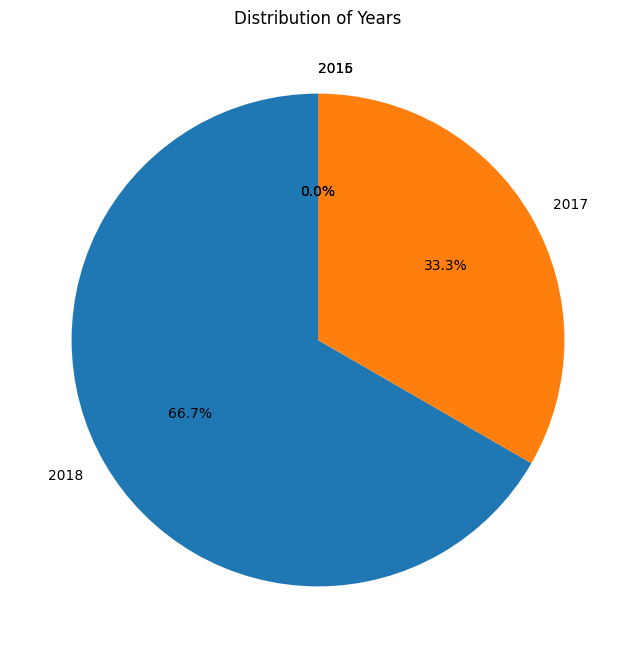

In [27]:
# Count the occurrences of each year
year_counts = df['year'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(year_counts, labels=year_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Years')
plt.show()

### Outlier Detection and Handling

####Visualize outliers

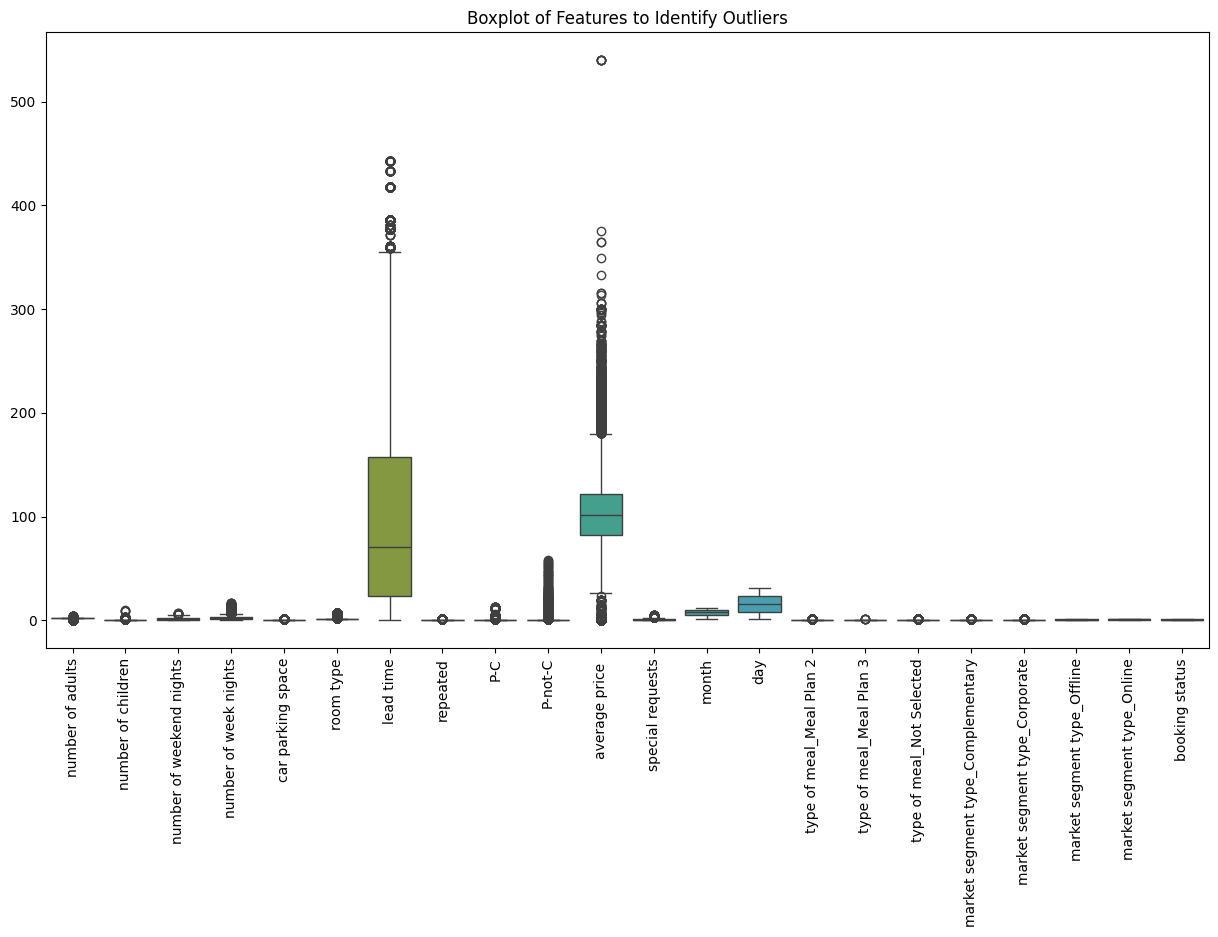

In [ ]:

plt.figure(figsize=(15, 8))
sns.boxplot(data=X)
plt.xticks(rotation=90)  # Rotate feature names for better readability
plt.title('Boxplot of Features to Identify Outliers')
plt.show()


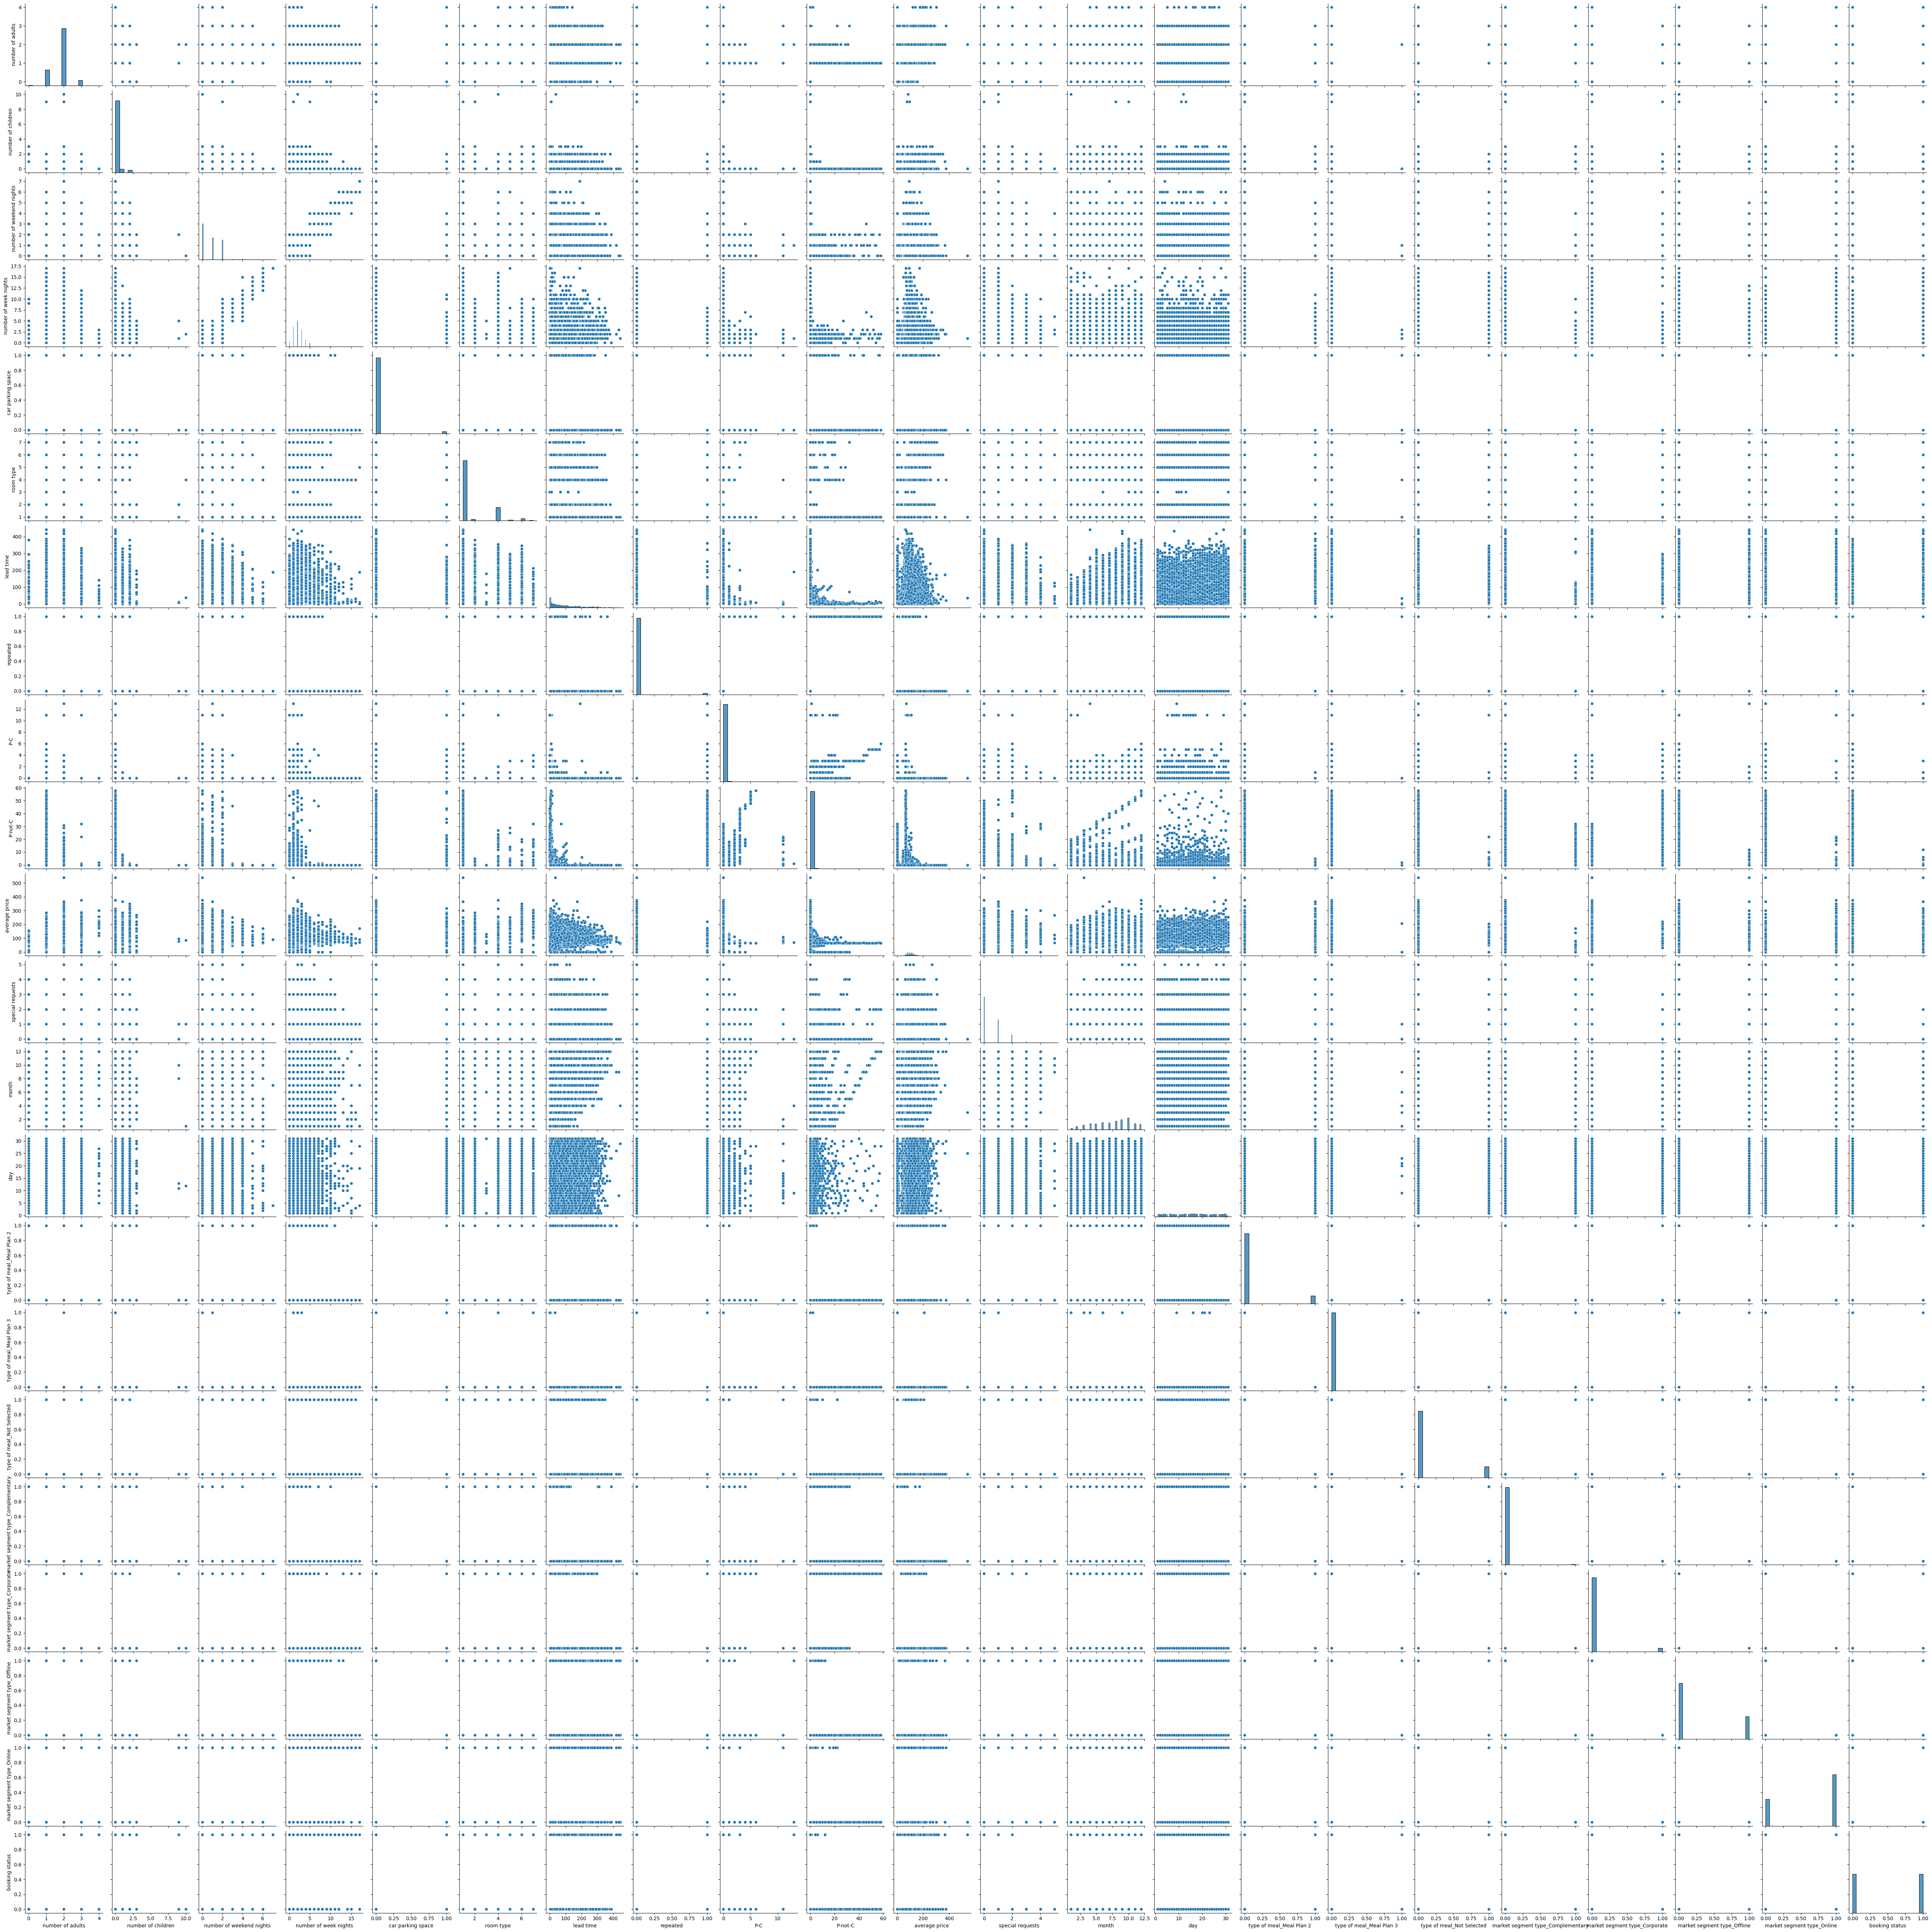

In [ ]:
sns.pairplot(X)
plt.show()


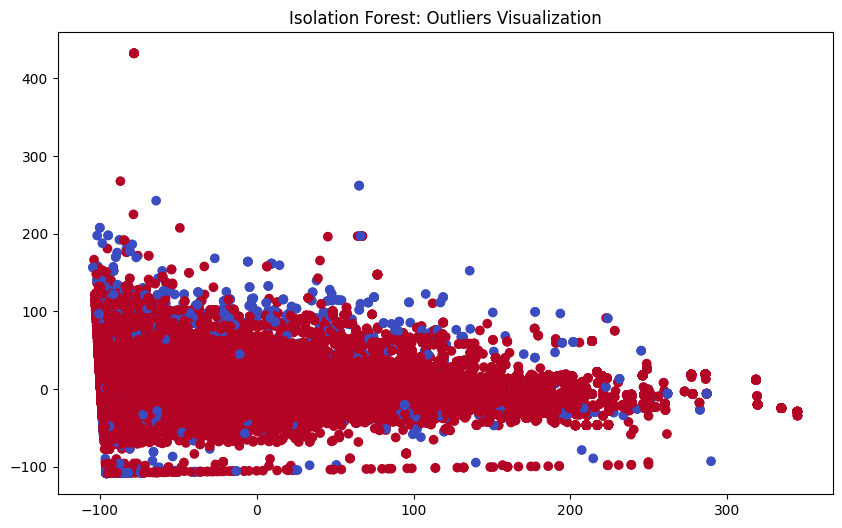

In [ ]:
from sklearn.ensemble import IsolationForest

# Fit the model
clf = IsolationForest(contamination=0.05)  # Adjust contamination level as needed
clf.fit(X)

# Add an 'anomaly' column to your dataframe
X['anomaly'] = clf.predict(X)

# Visualize the outliers in 2D using the first two principal components
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.drop('anomaly', axis=1))

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=X['anomaly'], cmap='coolwarm')
plt.title('Isolation Forest: Outliers Visualization')
plt.show()


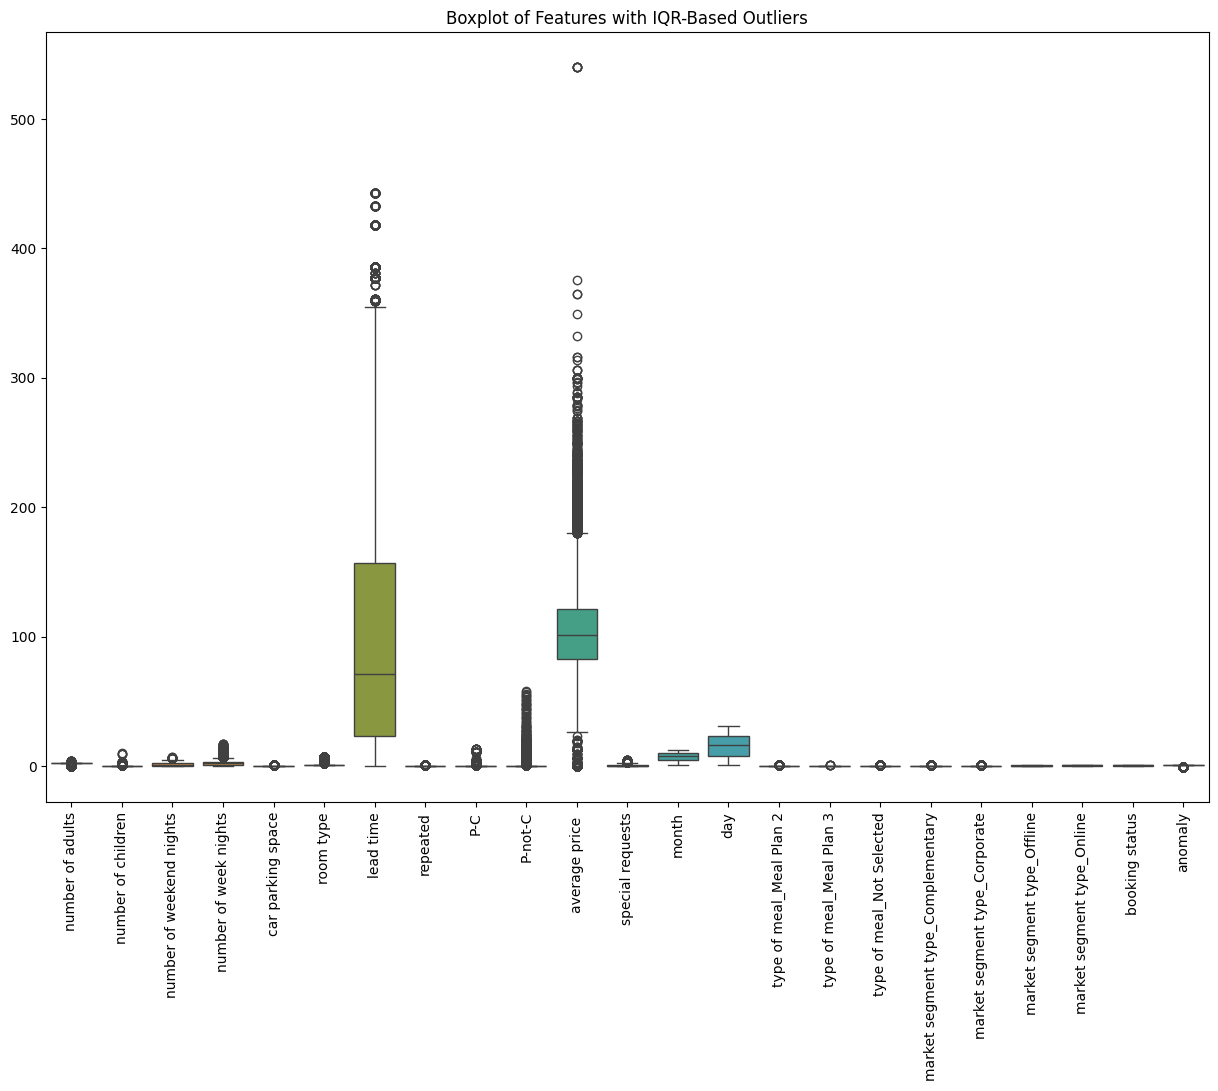

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)

# Compute the IQR for each feature
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = (X < lower_bound) | (X > upper_bound)

# Visualize with Boxplot (automatically displays outliers)
plt.figure(figsize=(15, 10))
sns.boxplot(data=X)
plt.xticks(rotation=90)  # Rotate feature names if needed
plt.title('Boxplot of Features with IQR-Based Outliers')
plt.show()

#### IQR

In [28]:
def cap_outliers(df, col):
    lower_cap = df[col].quantile(0.01)  # 1st percentile
    upper_cap = df[col].quantile(0.99)  # 99th percentile
    df[col] = np.where(df[col] < lower_cap, lower_cap, df[col])
    df[col] = np.where(df[col] > upper_cap, upper_cap, df[col])
    return df

# Apply capping to columns with significant outliers
for col in ['lead time', 'average price ' ]:
    X = cap_outliers(X, col)


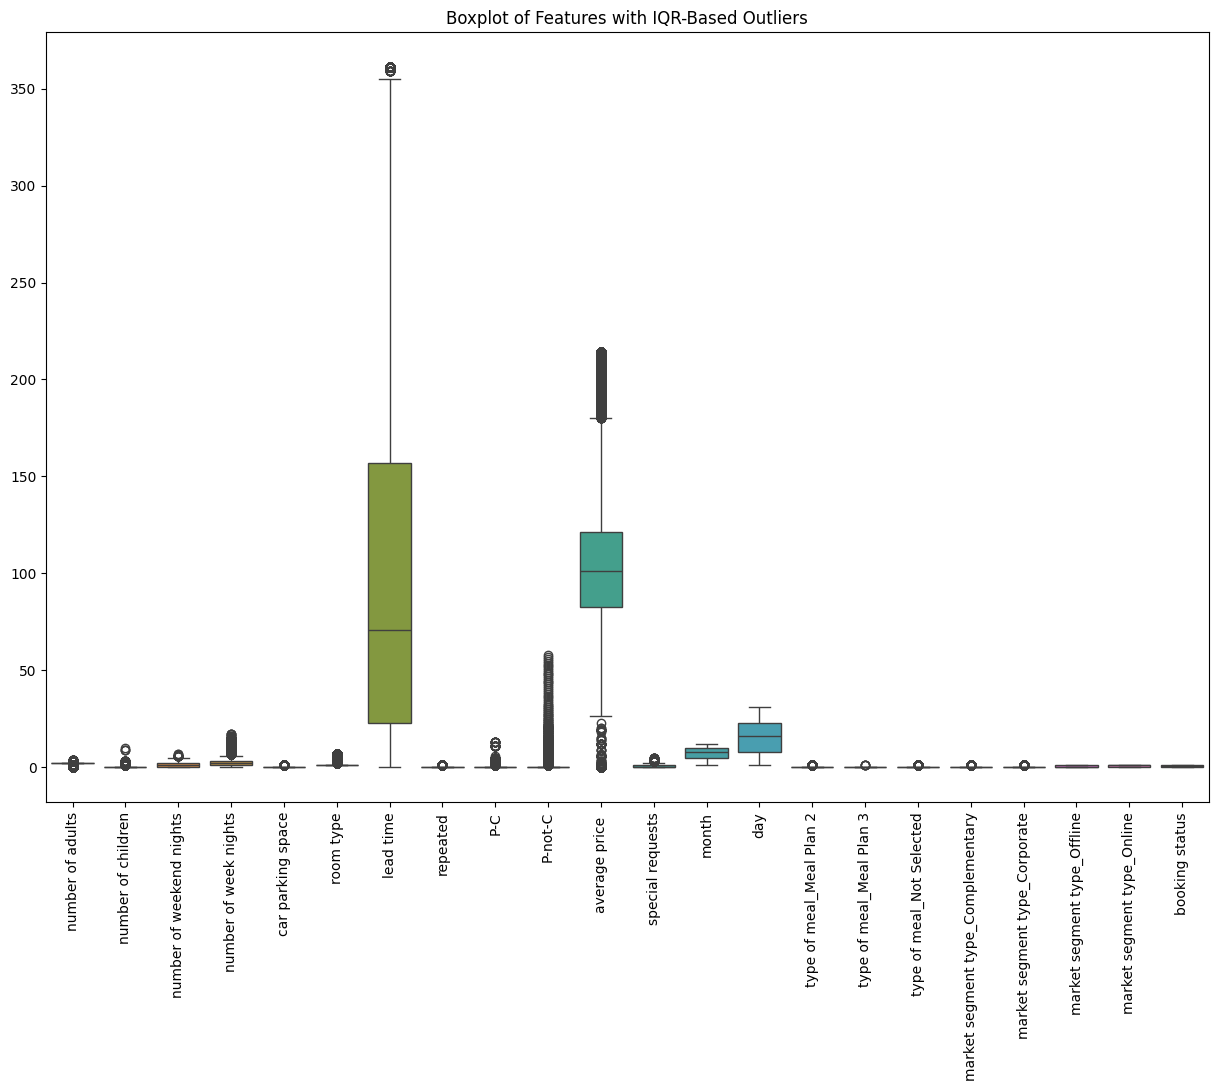

In [29]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)

# Compute the IQR for each feature
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = (X < lower_bound) | (X > upper_bound)

# Visualize with Boxplot (automatically displays outliers)
plt.figure(figsize=(15, 10))
sns.boxplot(data=X)
plt.xticks(rotation=90)  # Rotate feature names if needed
plt.title('Boxplot of Features with IQR-Based Outliers')
plt.show()

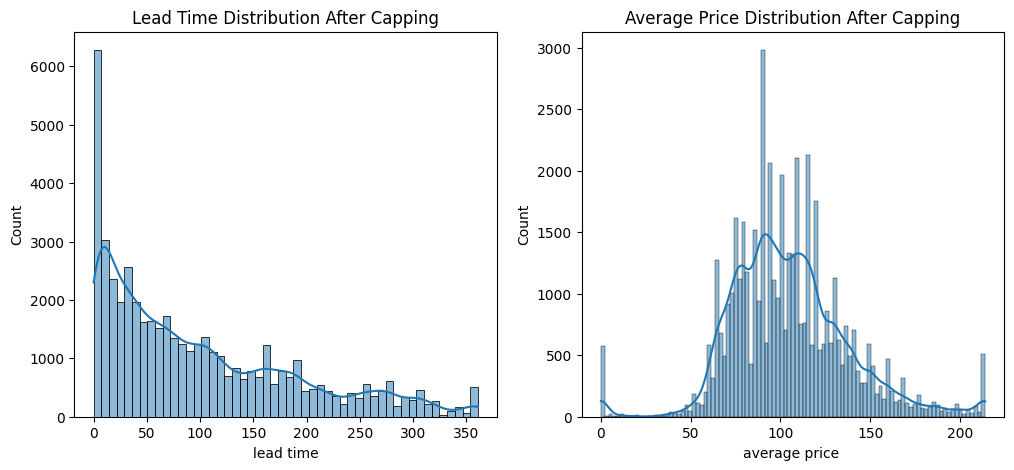

In [30]:
# Visualize the capped distributions
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(X['lead time'], kde=True)
plt.title('Lead Time Distribution After Capping')

plt.subplot(1, 2, 2)
sns.histplot(X['average price '], kde=True)
plt.title('Average Price Distribution After Capping')

plt.show()


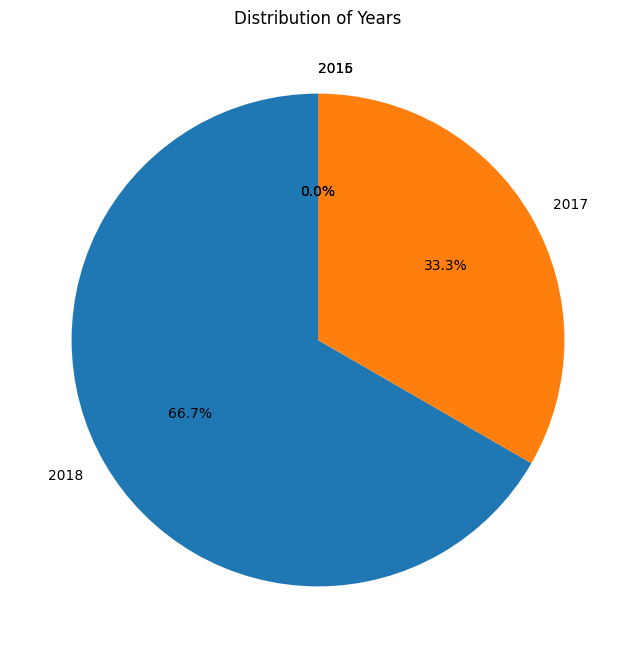

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Count the occurrences of each year
year_counts = df['year'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(year_counts, labels=year_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Years')
plt.show()

### Feature Engineering

####Feature visualization

####Feature selection

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61896 entries, 0 to 61895
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   number of adults                   61896 non-null  int64  
 1   number of children                 61896 non-null  int64  
 2   number of weekend nights           61896 non-null  int64  
 3   number of week nights              61896 non-null  int64  
 4   car parking space                  61896 non-null  int64  
 5   room type                          61896 non-null  int64  
 6   lead time                          61896 non-null  int64  
 7   repeated                           61896 non-null  int64  
 8   P-C                                61896 non-null  int64  
 9   P-not-C                            61896 non-null  int64  
 10  average price                      61896 non-null  float64
 11  special requests                   61896 non-null  int

####SelectKBest

In [33]:
X = df.drop('booking status', axis=1)
y = df['booking status']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Selection using SelectKBest
selector = SelectKBest(score_func=f_classif, k=15)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get selected feature names
selected_features = X.columns[selector.get_support()].tolist()
print("Selected features:", selected_features)

Selected features: ['number of adults', 'number of weekend nights', 'number of week nights', 'car parking space', 'lead time', 'repeated', 'P-not-C', 'average price ', 'special requests', 'month', 'type of meal_Meal Plan 2', 'market segment type_Complementary', 'market segment type_Corporate', 'market segment type_Online', 'year']


####Recursive Feature Elimination (REF)

In [34]:
from sklearn.feature_selection import RFE

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the RandomForest model
model = RandomForestClassifier()

# RFE with RandomForest classifier to select the top features
rfe = RFE(estimator=model, n_features_to_select=15)
rfe.fit(X_train, y_train)

# Check selected features
print("Selected Features: ", X.columns[rfe.support_])
selected_features=X.columns[rfe.support_].tolist()
# Train model with selected features
X_train_rfe = X_train[X.columns[rfe.support_]]
X_test_rfe = X_test[X.columns[rfe.support_]]
model.fit(X_train_rfe, y_train)

# Predict and calculate accuracy
y_pred = model.predict(X_test_rfe)
print(f"Model Accuracy after RFE: {accuracy_score(y_test, y_pred)}")


Selected Features:  Index(['number of adults', 'number of weekend nights', 'number of week nights',
       'car parking space', 'room type', 'lead time', 'average price ',
       'special requests', 'month', 'day', 'type of meal_Meal Plan 2',
       'type of meal_Not Selected', 'market segment type_Offline',
       'market segment type_Online', 'year'],
      dtype='object')
Model Accuracy after RFE: 0.9495934083687867


####Feature Importance using Random Forest

Feature ranking:
1. Feature lead time (0.3129844106608156)
2. Feature average price  (0.14240095665002725)
3. Feature special requests (0.10081118632197804)
4. Feature month (0.09222730424791832)
5. Feature day (0.08982990037559307)
6. Feature year (0.05197086564836999)
7. Feature number of week nights (0.04957566087060785)
8. Feature number of weekend nights (0.03436404359660388)
9. Feature market segment type_Online (0.026025770085361312)
10. Feature number of adults (0.02141579493357797)
11. Feature market segment type_Offline (0.016496033291099624)
12. Feature room type (0.014379464795310291)
13. Feature type of meal_Meal Plan 2 (0.013349490388754525)
14. Feature type of meal_Not Selected (0.008158564438252849)
15. Feature car parking space (0.007140511012643765)
16. Feature number of children (0.006331299752397885)
17. Feature market segment type_Corporate (0.00546761644130516)
18. Feature repeated (0.0030632468214393184)
19. Feature P-not-C (0.0020881015346843916)
20. Feature mar

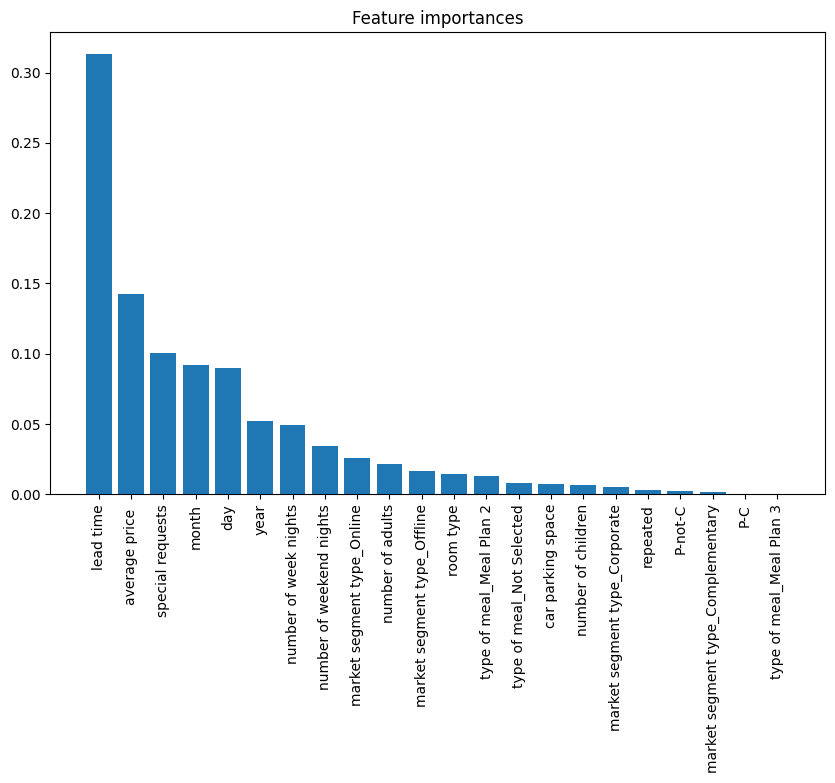

In [35]:
# Fit the RandomForest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Get feature importance
importances = model.feature_importances_

# Sort feature importance in descending order
indices = np.argsort(importances)[::-1]

# Print feature ranking
print("Feature ranking:")
for i in range(X.shape[1]):
    print(f"{i + 1}. Feature {X.columns[indices[i]]} ({importances[indices[i]]})")

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.show()


### Model Test & Accuracy

In [36]:
# Separate features from the target
X = df[selected_features]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up the pipeline with the best parameters
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Apply feature scaling
    ('classifier', RandomForestClassifier(
        n_estimators=300,               # Best n_estimators
        max_depth=30,                   # Best max_depth
        min_samples_split=2,            # Best min_samples_split
        min_samples_leaf=1,             # Best min_samples_leaf
        bootstrap=False,                # Best bootstrap
        random_state=42
    ))
])

# Perform cross-validation on training data
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='accuracy')
print(f"Cross-validation accuracy: {cv_scores.mean():.4f}")

# Train the model with the best parameters
pipeline.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = pipeline.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {test_accuracy:.4f}")


Cross-validation accuracy: 0.9459
Test accuracy: 0.9557


####Random forest

In [35]:
# Separate features from the target
X = df[selected_features]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Set up the pipeline (including feature scaling or feature engineering if needed)
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Apply feature scaling
    ('classifier', RandomForestClassifier(random_state=42))
])

# Perform cross-validation on training data
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='accuracy')
print(f"Cross-validation accuracy: {cv_scores.mean():.4f}")

# Hyperparameter tuning using RandomizedSearchCV (for efficiency)
param_distributions = {
    'classifier__n_estimators': [100, 200, 300, 400, 500],
    'classifier__max_depth': [10, 20, 30, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__bootstrap': [True, False]
}

# Randomized Search
random_search = RandomizedSearchCV(pipeline, param_distributions, n_iter=20, cv=cv, verbose=1, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Best hyperparameters from Random Search
print(f"Best hyperparameters from RandomizedSearchCV: {random_search.best_params_}")

# Evaluate the model with the best parameters on the test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {test_accuracy:.4f}")


Cross-validation accuracy: 0.9442
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best hyperparameters from RandomizedSearchCV: {'classifier__n_estimators': 300, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 1, 'classifier__max_depth': 30, 'classifier__bootstrap': False}
Test accuracy: 0.9557


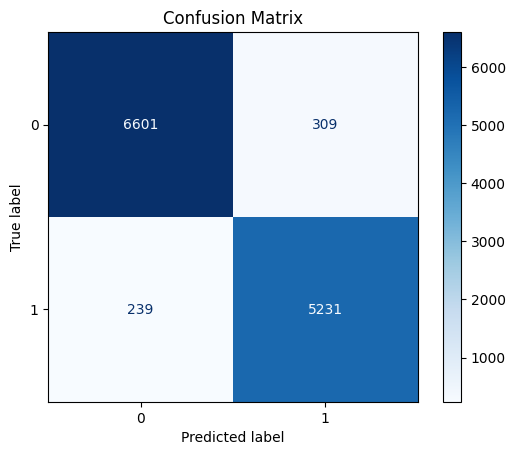

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = best_model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


###Extract model

In [38]:
import pickle

# Save the model to a file using pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(pipeline, file)

# To load the model from the file later:
with open('model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [39]:
from joblib import dump, load

# Save the model using joblib
dump(pipeline, 'model.joblib')

# To load the model from the file later:
loaded_model = load('model.joblib')
